In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
BRFSS2021 = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSV/BRFSS2021.csv')

In [ ]:
# Feature selection
DF = BRFSS2021[['BPHIGH6', 'TOLDHI3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'CHCSCNCR', 'CHCOCNCR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SEXVAR', '_AGE_G', 'MARITAL', 'EDUCA', 'VETERAN3', 'EMPLOY1', 'INCOME3', '_RACE', '_SMOKER3', 'USENOW3', 'ECIGNOW1', '_RFDRHV7', 'DIFFALON', 'DECIDE']]

In [ ]:
# Cleaning nulls
DF = DF.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'EMPLOY1': [9],
    'PRIMINSR': [77, 99],
    'INCOME3': [77, 99],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in DF.columns:
        DF = DF[~DF[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in DF.columns:
    if column not in refuse_values:
        refuse = [7, 9, 77, 99, 777, 999, 7777, 9999, 77777, 99999, 777777, 999999]
        DF = DF[~DF[column].isin(refuse)]

In [ ]:
# Dictionary to map old column names to new column names
column_mapping = {
    'BPHIGH6': 'Blood Pressure',
    'TOLDHI3': 'Cholesterol',
    'CVDINFR4': 'Myocardial Infarction',
    'CVDCRHD4': 'Heart Disease',
    'CVDSTRK3': 'Stroke',
    'ASTHMA3': 'Asthma',
    'CHCCOPD3': 'Bronchitis',
    'ADDEPEV3': 'Depressive Disorder',
    'CHCKDNY2': 'Renal Issue',
    'DIABETE4': 'Diabete',
    'CHCSCNCR': 'Skin Cancer',
    'CHCOCNCR': 'Cancer',
    'GENHLTH': 'General Health',
    'PHYSHLTH': 'Physical Health',
    'MENTHLTH': 'Mental Health',
    'PRIMINSR': 'Health Insurance',
    'PERSDOC3': 'Personal Health Care',
    'MEDCOST1': 'Medical Cost',
    'CHECKUP1': 'Routine Check',
    'EXERANY2': 'Exercise',
    'SEXVAR': 'Gendar',
    '_AGE_G': 'Age Group',
    'MARITAL': 'Marrital Status',
    'EDUCA': 'Eduction Status',
    'VETERAN3': 'Military Record',
    'EMPLOY1': 'Employment Status',
    'INCOME3': 'Income',
    '_RACE': 'Ethnicity',
    '_SMOKER3': 'Smoking Status',
    'USENOW3': 'Non-Smoking Tobacco',
    'ECIGNOW1': 'E-cigarette',
    '_RFDRHV7': 'Alcohol Consumption',
    'DIFFALON': 'Errands Alone',
    'DECIDE': 'Cognition Dysfunction'
}

# Rename the columns using the mapping
DF = DF.rename(columns=column_mapping)

In [ ]:
# Separating data
Healthy = DF[DF['Cognition Dysfunction']==2]
Affected = DF[DF['Cognition Dysfunction']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.30, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['Cognition Dysfunction'], axis=1) # Input features
y_train = train['Cognition Dysfunction'] # Target label

x_test = test.drop(['Cognition Dysfunction'], axis=1) # Input features
y_test = test['Cognition Dysfunction'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 15545


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 6663


# Adaptive Synthetic Sampling and Tomek-Links

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create an imbalanced-learn pipeline with ADASYN oversampling and Tomek Links undersampling
pipeline = Pipeline([
    ('adasyn', ADASYN(sampling_strategy='minority')),
    ('tomek', TomekLinks(sampling_strategy='majority')),
])

# Fit the pipeline on the training data
x_train_resampled, y_train_resampled = pipeline.fit_resample(x_train, y_train)

# Check the class distribution in the resampled dataset
print("Class distribution in the resampled dataset:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution in the resampled dataset:
0    109969
1    109004
dtype: int64


In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
x_train_resampled = pd.DataFrame(x_train_resampled)
y_train_resampled = pd.DataFrame(y_train_resampled)

# Save oversampled data
x_train_resampled.to_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/ADASYNTOMEK/x_train_resampled.csv', index=False)
y_train_resampled.to_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/ADASYNTOMEK/y_train_resampled.csv', index=False)
"""

In [ ]:
# Load oversampled data
x_train_resampled = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/ADASYNTOMEK/x_train_resampled.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/ADASYNTOMEK/y_train_resampled.csv')

In [ ]:
import copy

x_train = copy.deepcopy(x_train_resampled) # Copying oversampled input data
y_train = copy.deepcopy(y_train_resampled) # Copying oversampled target data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 0    109969
dtype: int64
Class 1 count: 0    109004
dtype: int64


In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
!pip install flwr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
    Uninstalling typer-0.12.3:
      Successfully uninstalled typer-0.12.3
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Exception in thread Thread-16 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-33-c036682ead40>", line 102, in start_server
TypeError: FedProx.__init__() got an unexpected keyword argument 'prox_alpha'
	Instead, use `flwr.client.start_client()` by ensuring you first call the `.to_client()` method as shown below: 
	flwr.client.start_client(
		server_address='<IP>:<PORT>',
		client=FlowerClient().to_client(), # <-- where FlowerClient is of type flwr.client.NumPyClient object
	)
	Using `start_numpy_client()` is deprecated.

            This is 

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.2326 - loss: 1.0870
Test Loss: 1.0868499279022217
Test Accuracy: 0.23392875492572784
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
Normalized Confusion Matrix:
[[0.2069815  0.7930185 ]
 [0.32117665 0.67882335]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.21      0.34    110005
     Class 1       0.05      0.68      0.09      6663

    accuracy                           0.23    116668
   macro avg       0.48      0.44      0.21    116668
weighted avg       0.86      0.23      0.32    116668



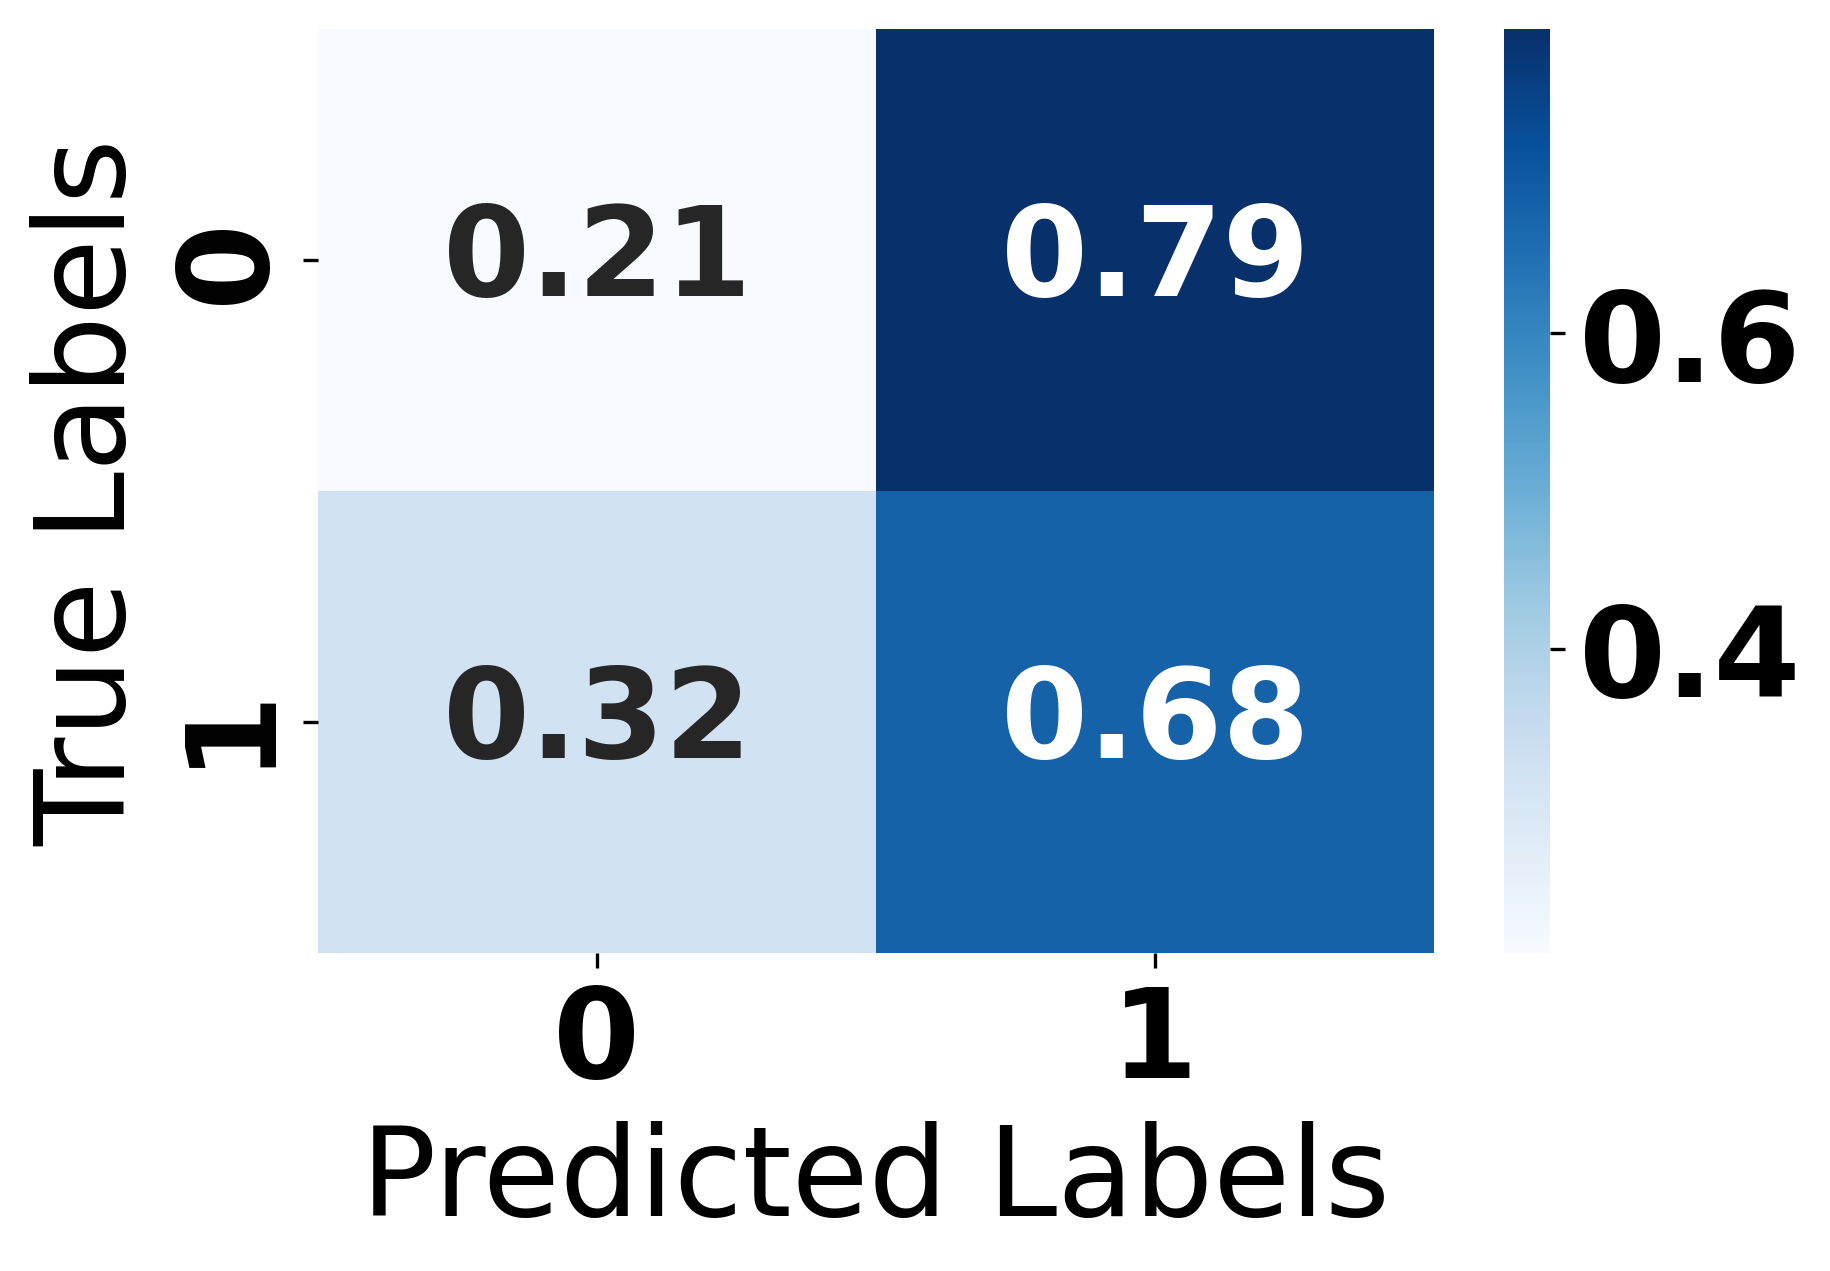

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl
from sklearn.utils import class_weight
import threading

# Assuming x_train, y_train, x_test, y_test are already loaded


# Combine and shuffle the data
train_data = pd.concat([x_train, y_train], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 4
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['0'], axis=1).values
    y_client = client_datasets[i]['0'].values
    client_data.append((x_client, y_client))

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define the model architecture with attention mechanism
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create and compile the model
def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Flower client class
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.factor = 1

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        class_weights_dict = get_class_weights(self.y_train, self.factor)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=64,
                       validation_data=(self.x_test, self.y_test),
                       class_weight=class_weights_dict, verbose=0)
        self.factor += 0.1  # Increase the factor for the next round
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return loss, len(self.x_test), {"accuracy": accuracy}

# Start federated learning server using FedProx
def start_server():
    strategy = fl.server.strategy.FedProx(
        min_fit_clients=num_clients,
        min_available_clients=num_clients,
        prox_alpha=0.5  # Proximal term coefficient, adjust as needed
    )
    fl.server.start_server(
        server_address="0.0.0.0:8080",  # Binding to all interfaces
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start federated learning clients
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="0.0.0.0:8080", client=client)

# Use threading to simulate multiple clients
def simulate_clients_and_server():
    # Start server in a separate thread
    server_thread = threading.Thread(target=start_server)
    server_thread.start()

    # Start each client in separate threads
    client_threads = []
    for i in range(num_clients):
        client_thread = threading.Thread(target=start_client, args=(i,))
        client_threads.append(client_thread)
        client_thread.start()

    # Wait for all threads to complete
    for client_thread in client_threads:
        client_thread.join()

# Run the simulation
simulate_clients_and_server()

# Evaluate the final model
final_model = create_compiled_keras_model()

# Assuming you have loaded the final model's weights (optional step depending on setup)
# final_model.load_weights('path_to_final_weights.h5')

# Evaluate the final model
loss, accuracy = final_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict probabilities on test data
y_pred_prob = final_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

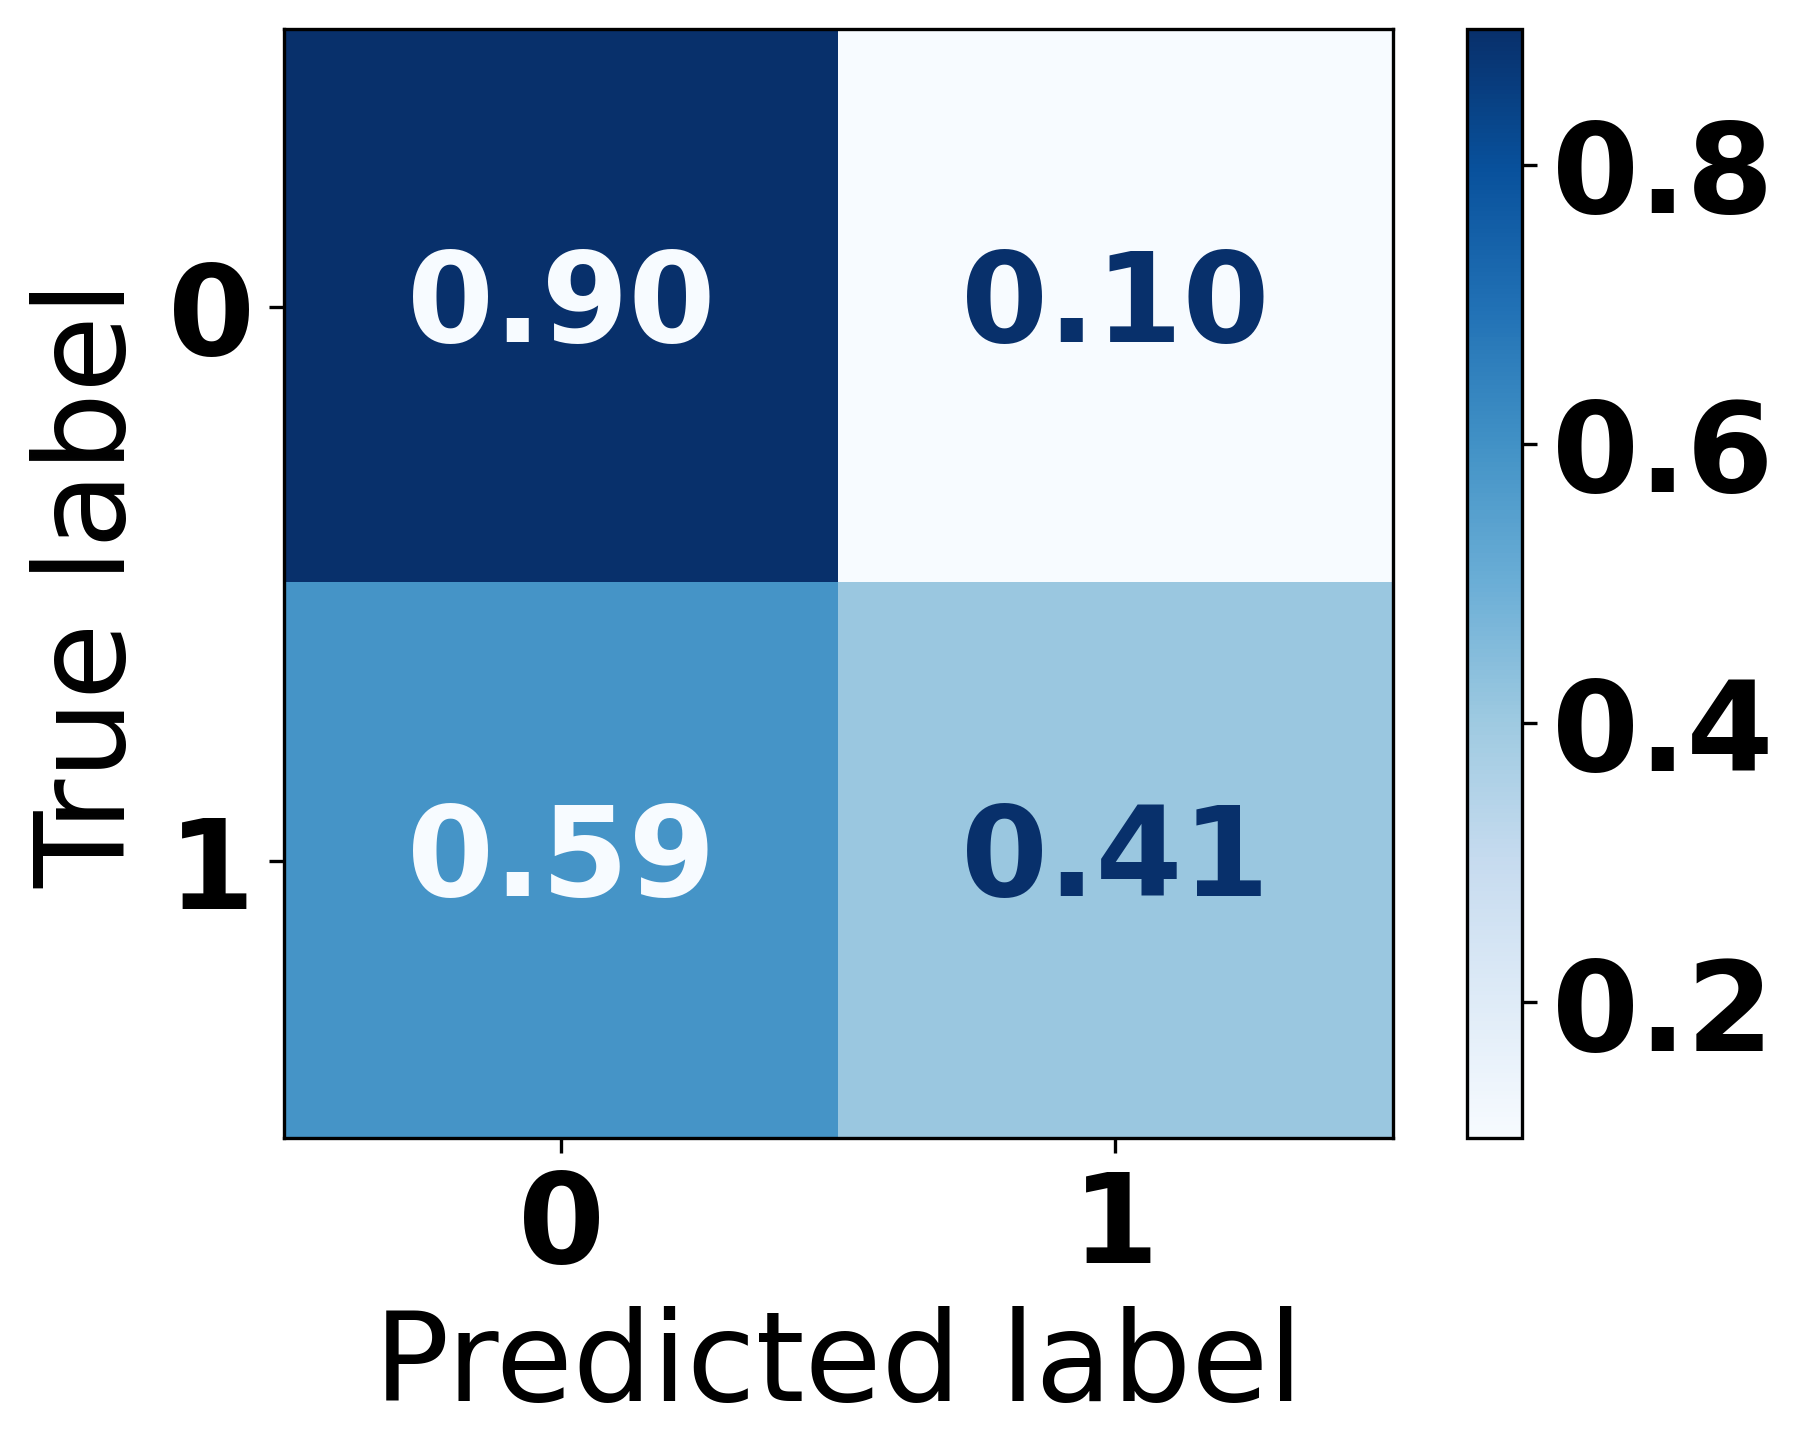

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.90      0.93    110005
     Class 1       0.19      0.41      0.26      6663

    accuracy                           0.87    116668
   macro avg       0.58      0.65      0.60    116668
weighted avg       0.92      0.87      0.89    116668

Train Accuracy: 0.9997488274810137
Test Accuracy: 0.8693643501217129


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


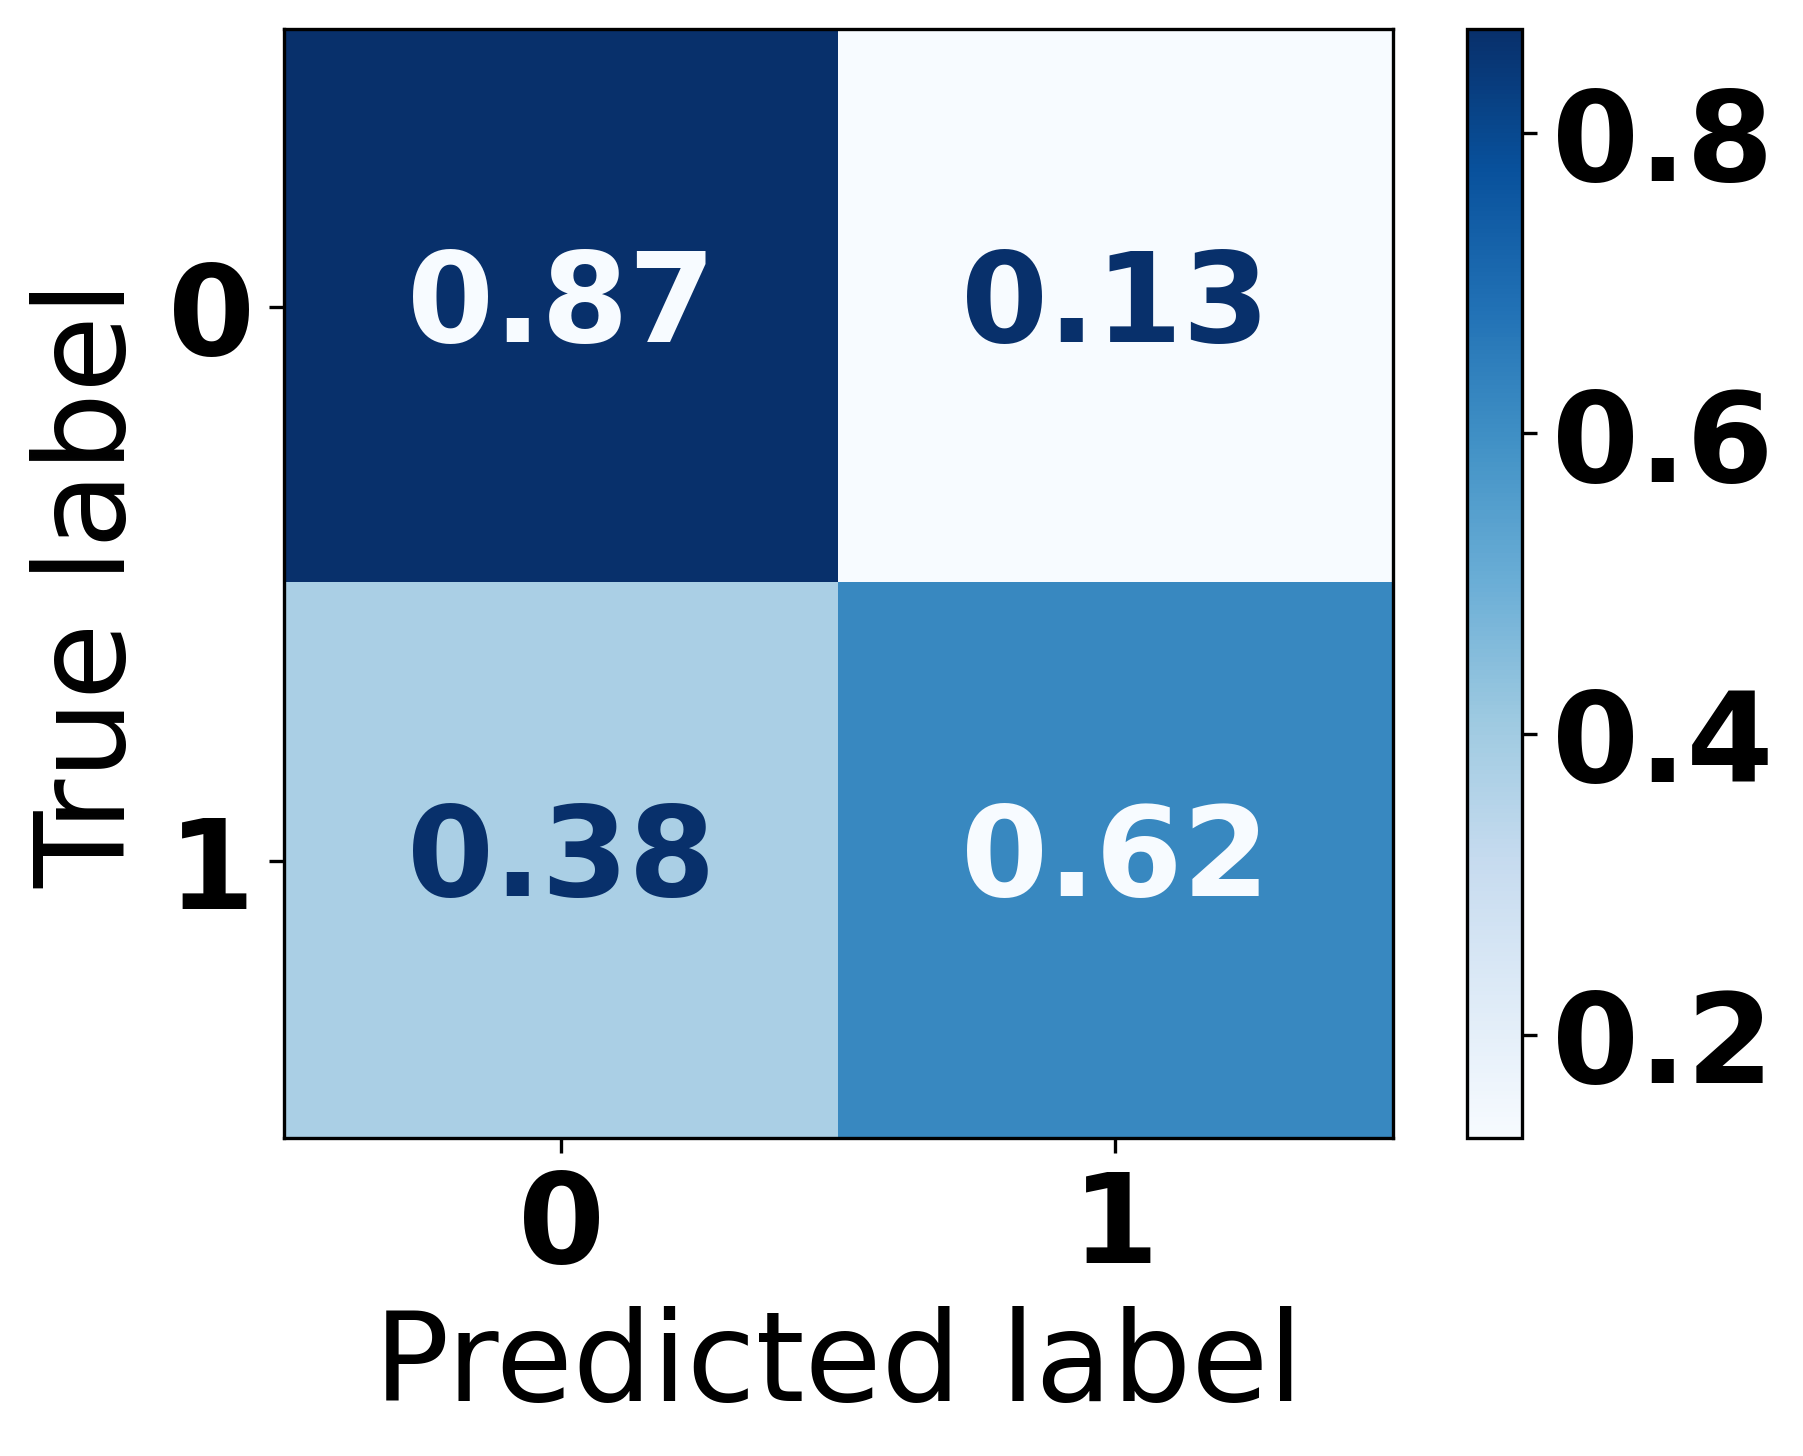

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.87      0.92    110005
     Class 1       0.22      0.62      0.33      6663

    accuracy                           0.85    116668
   macro avg       0.60      0.74      0.62    116668
weighted avg       0.93      0.85      0.88    116668

Train Accuracy: 0.8371899731930421
Test Accuracy: 0.8546388041279528


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=10, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

<ipython-input-42-2417d1570aca>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = RF.fit(x_train, y_train).predict(x_test)


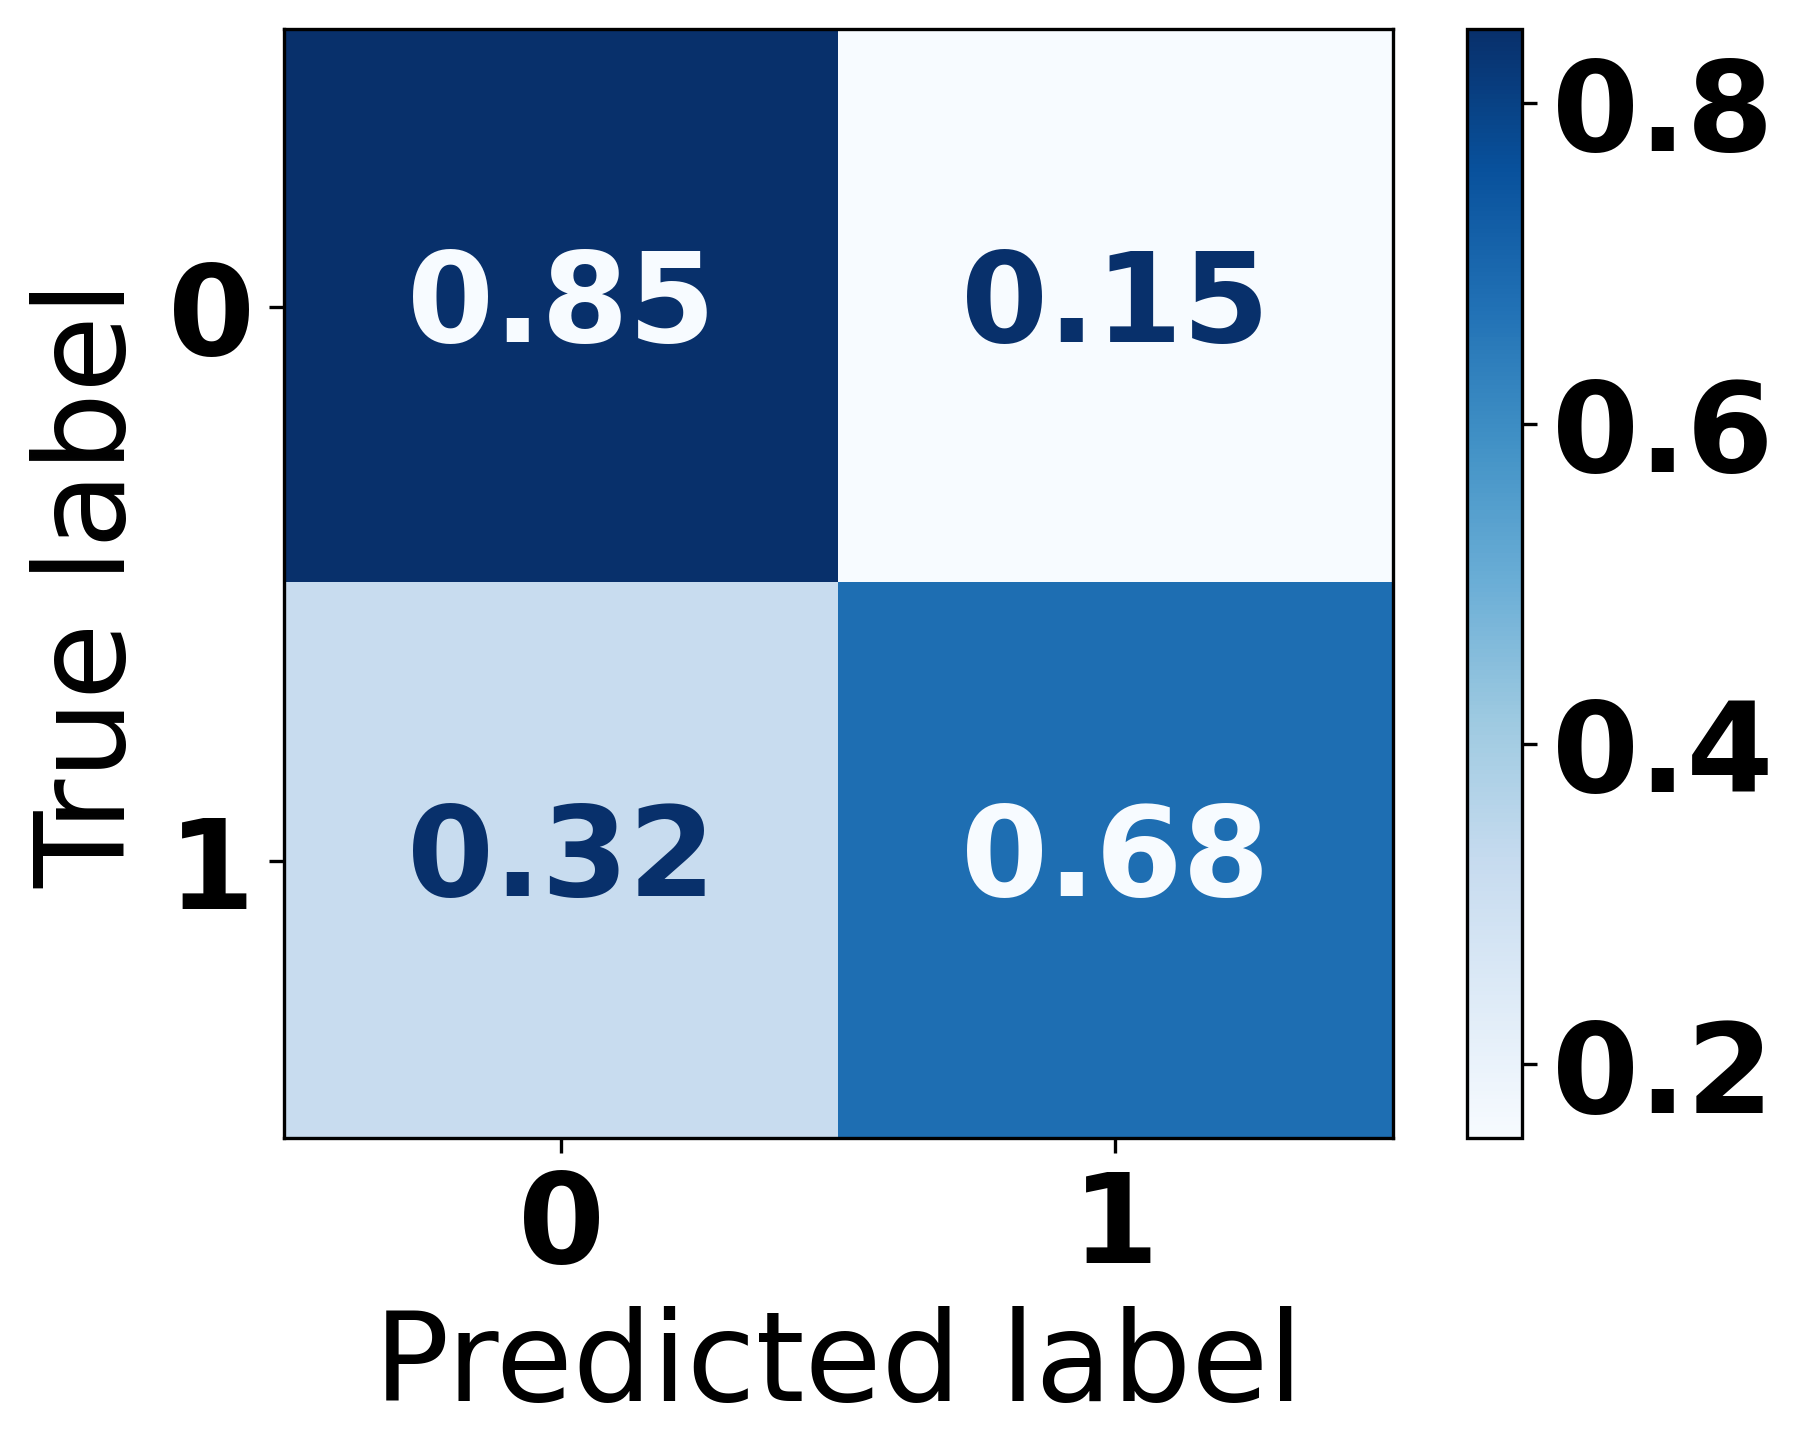

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91    110005
           1       0.21      0.68      0.32      6663

    accuracy                           0.84    116668
   macro avg       0.59      0.76      0.61    116668
weighted avg       0.93      0.84      0.87    116668

Train Accuracy: 0.8024733642960548
Test Accuracy: 0.8365190112113005


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


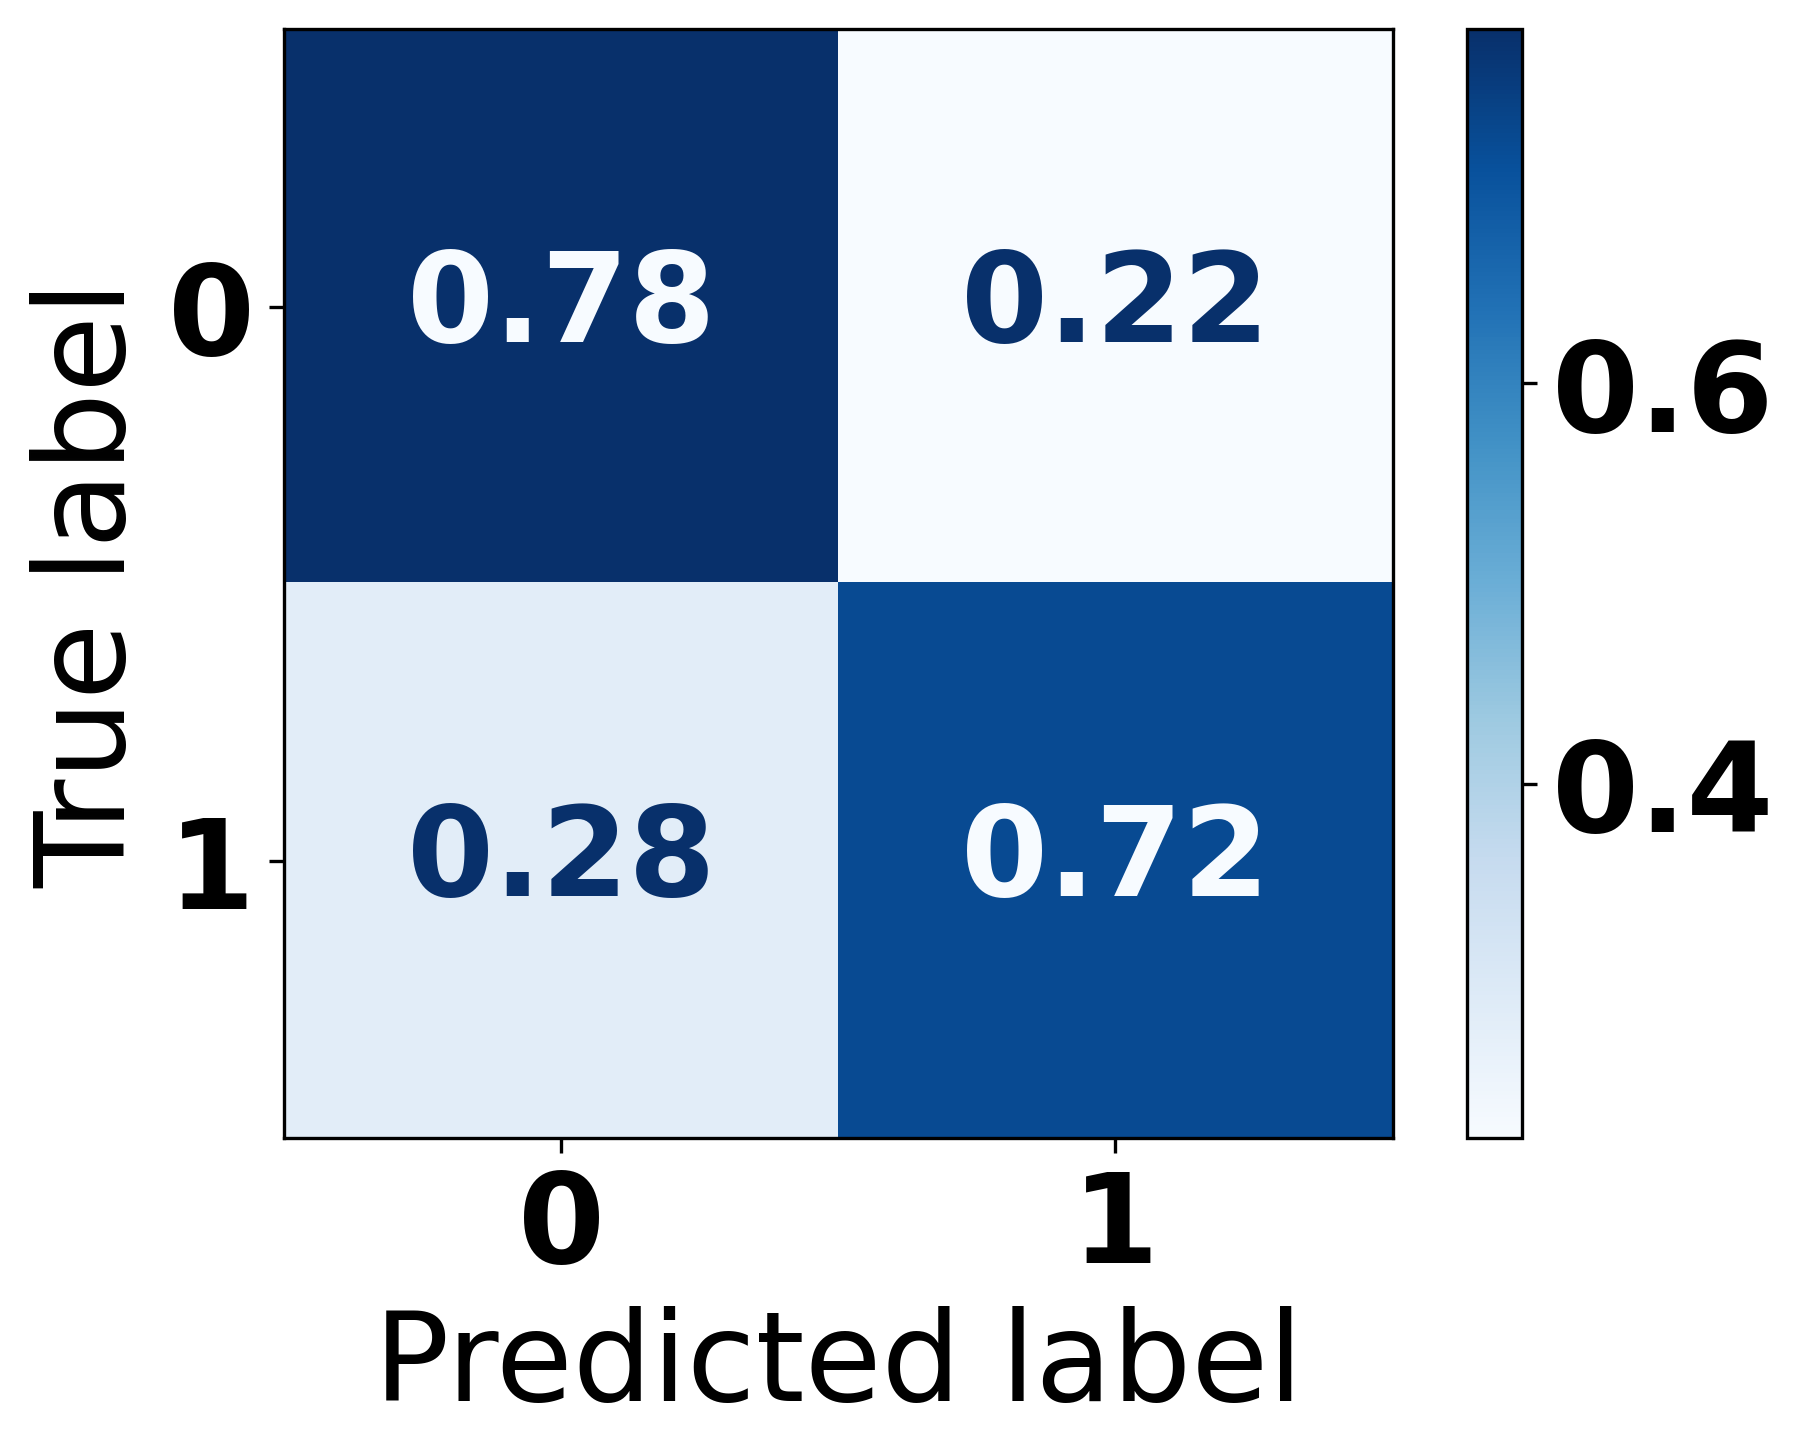

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87    110005
           1       0.16      0.72      0.27      6663

    accuracy                           0.77    116668
   macro avg       0.57      0.75      0.57    116668
weighted avg       0.93      0.77      0.83    116668

Train Accuracy: 0.7094390632635074
Test Accuracy: 0.7735197312030719


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


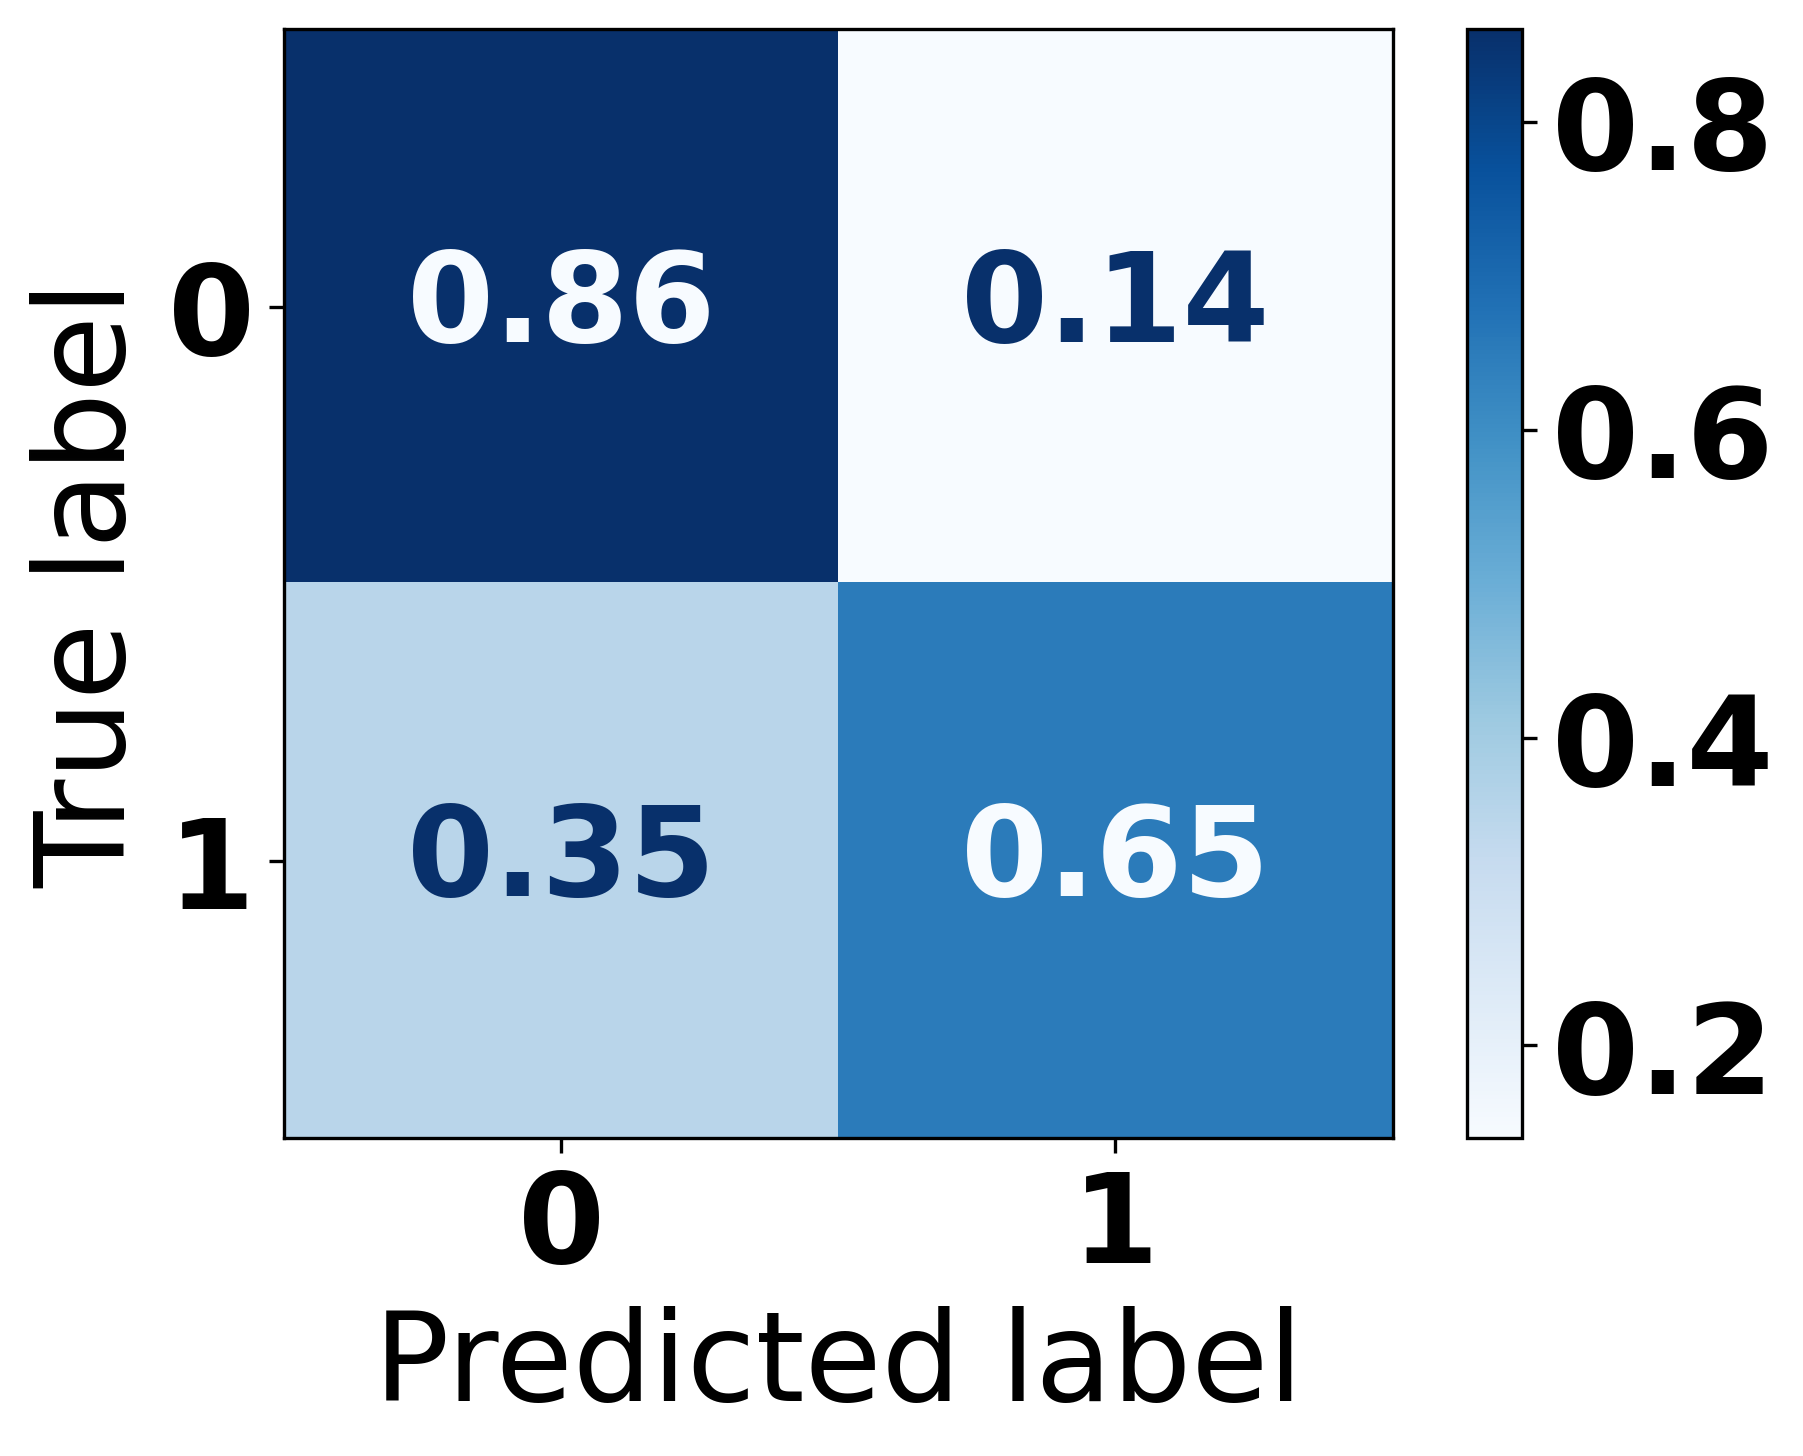

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91    110005
           1       0.22      0.65      0.33      6663

    accuracy                           0.85    116668
   macro avg       0.60      0.76      0.62    116668
weighted avg       0.93      0.85      0.88    116668

Train Accuracy: 0.8299059701424376
Test Accuracy: 0.8482874481434498


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=17, learning_rate=0.4, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

### Deep Learning Approach

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.8163538  0.1836462 ]
 [0.25604082 0.74395918]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.82      0.89    110005
     Class 1       0.20      0.74      0.31      6663

    accuracy                           0.81    116668
   macro avg       0.59      0.78      0.60    116668
weighted avg       0.94      0.81      0.86    116668



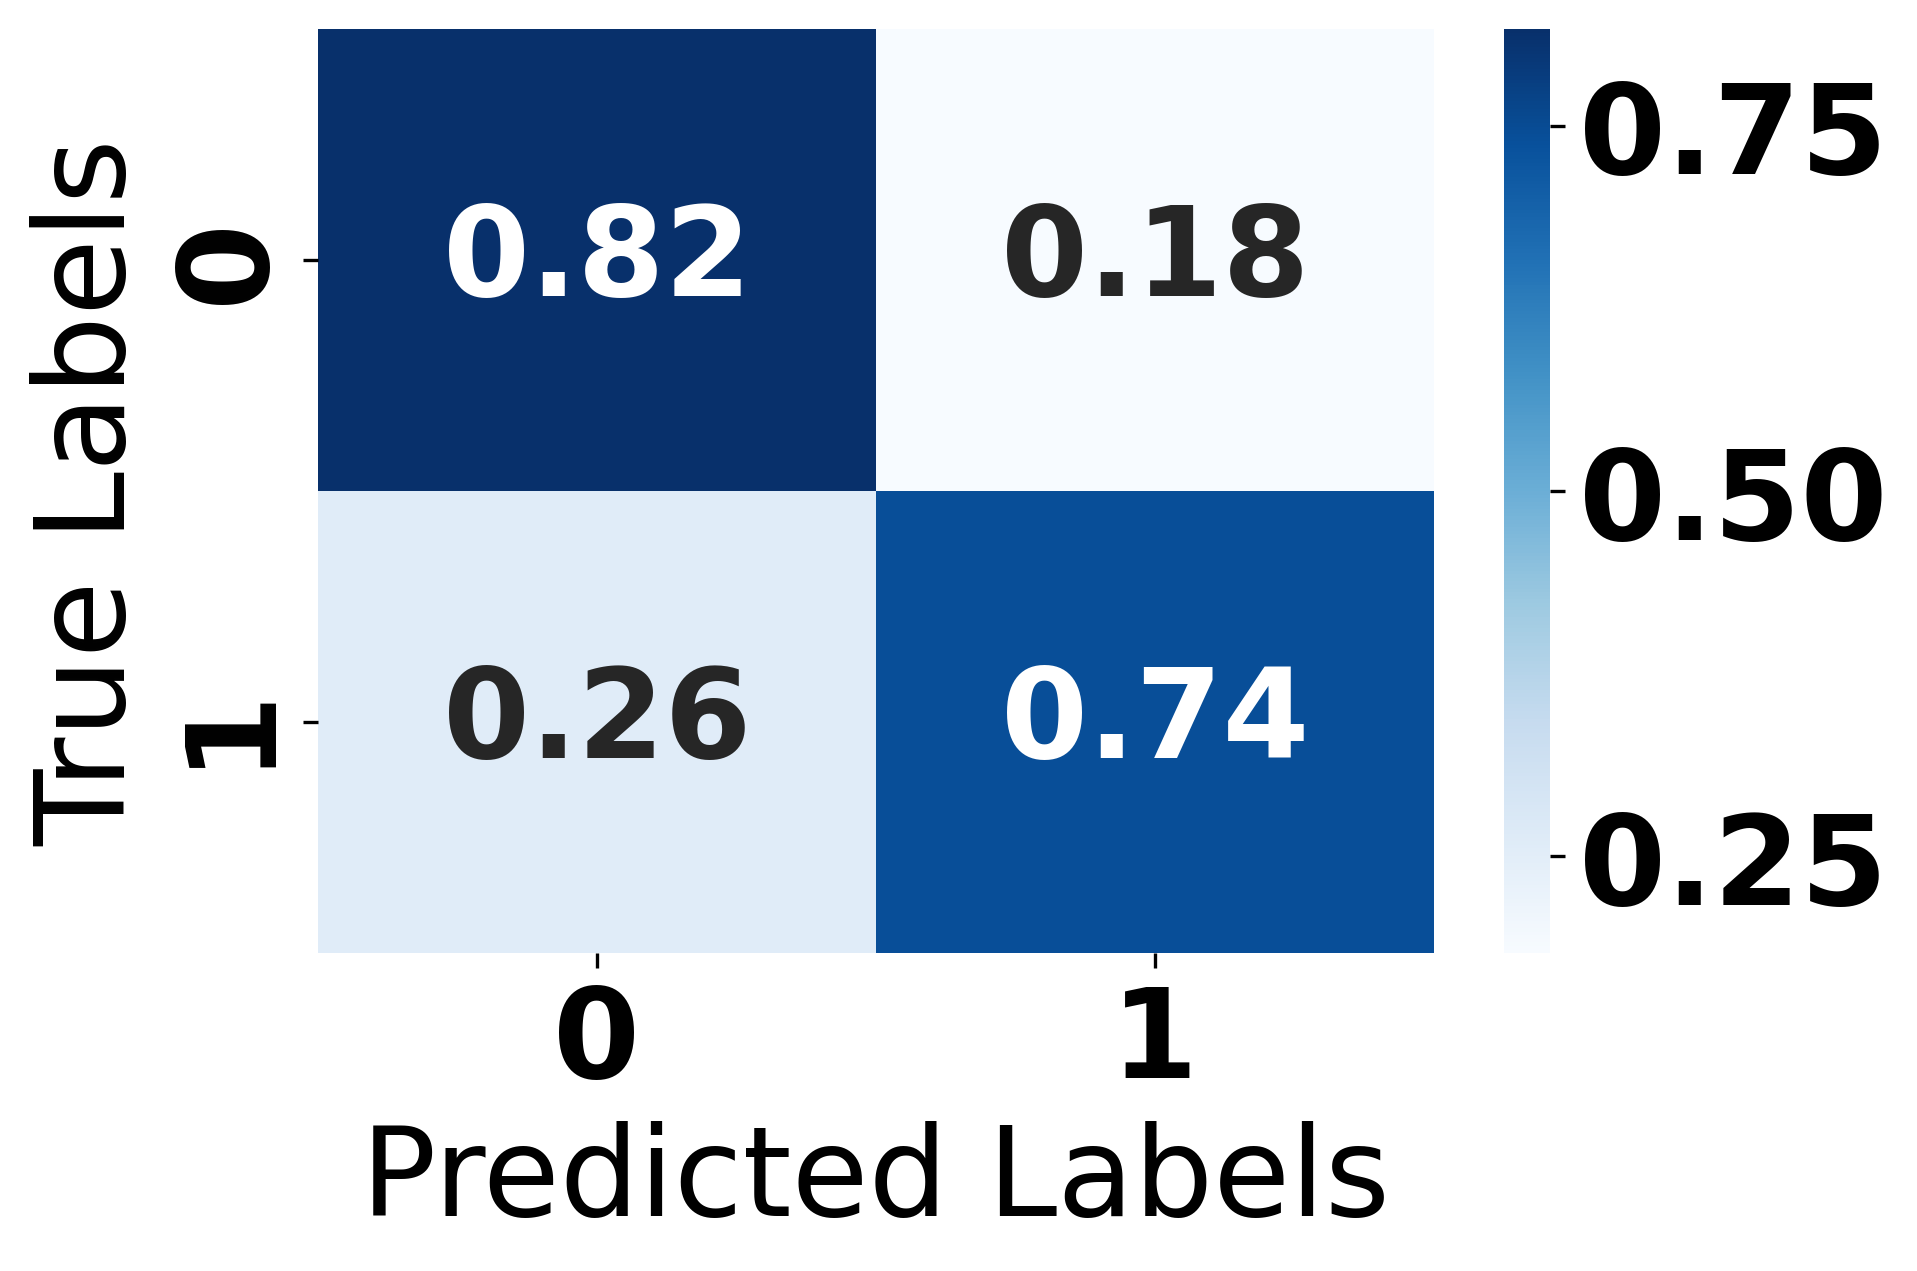

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/MyDrive/Cognition Dysfunction/Dataset/ADASYNTOMEK/model/MLP(ADASYNTOMEK).pkl')
"""

['/content/drive/MyDrive/Cognition Dysfunction/Dataset/ADASYNTOMEK/model/MLP(ADASYNTOMEK).pkl']

In [ ]:
import joblib

# Load the model from the file

MLP = joblib.load('/content/drive/MyDrive/Cognition Dysfunction/Dataset/ADASYNTOMEK/model/MLP(ADASYNTOMEK).pkl')

In [ ]:
# Calculate train accuracy
train_predictions = MLP.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate test accuracy
test_predictions = MLP.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print train and test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.7745292798655542
Test Accuracy: 0.8122192889224124


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1711/1711 [==============================] - 42s 24ms/step - loss: 0.5000 - accuracy: 0.7609 - val_loss: 0.2428 - val_accuracy: 0.9131
Epoch 2/10
1711/1711 [==============================] - 30s 18ms/step - loss: 0.3302 - accuracy: 0.8534 - val_loss: 0.4757 - val_accuracy: 0.8026
Epoch 3/10
1711/1711 [==============================] - 29s 17ms/step - loss: 0.2943 - accuracy: 0.8701 - val_loss: 0.2019 - val_accuracy: 0.9312
Epoch 4/10
1711/1711 [==============================] - 29s 17ms/step - loss: 0.2685 - accuracy: 0.8840 - val_loss: 0.2419 - val_accuracy: 0.9158
Epoch 5/10
1711/1711 [==============================] - 31s 18ms/step - loss: 0.2463 - accuracy: 0.8943 - val_loss: 0.3663 - val_accuracy: 0.8626
Epoch 6/10
1711/1711 [==============================] - 31s 18ms/step - loss: 0.2342 - accuracy: 0.8999 - val_loss: 0.2034 - val_accuracy: 0.9265
Epoch 7/10
1711/1711 [==============================] - 29s 17ms/step - loss: 0.2277 - accuracy: 0.9032 - val_loss: 0.2011 -

3646/3646 [==============================] - 8s 2ms/step
Normalized Confusion Matrix:
[[0.9173583  0.0826417 ]
 [0.50502777 0.49497223]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.92      0.94    110005
     Class 1       0.27      0.49      0.35      6663

    accuracy                           0.89    116668
   macro avg       0.62      0.71      0.64    116668
weighted avg       0.93      0.89      0.91    116668



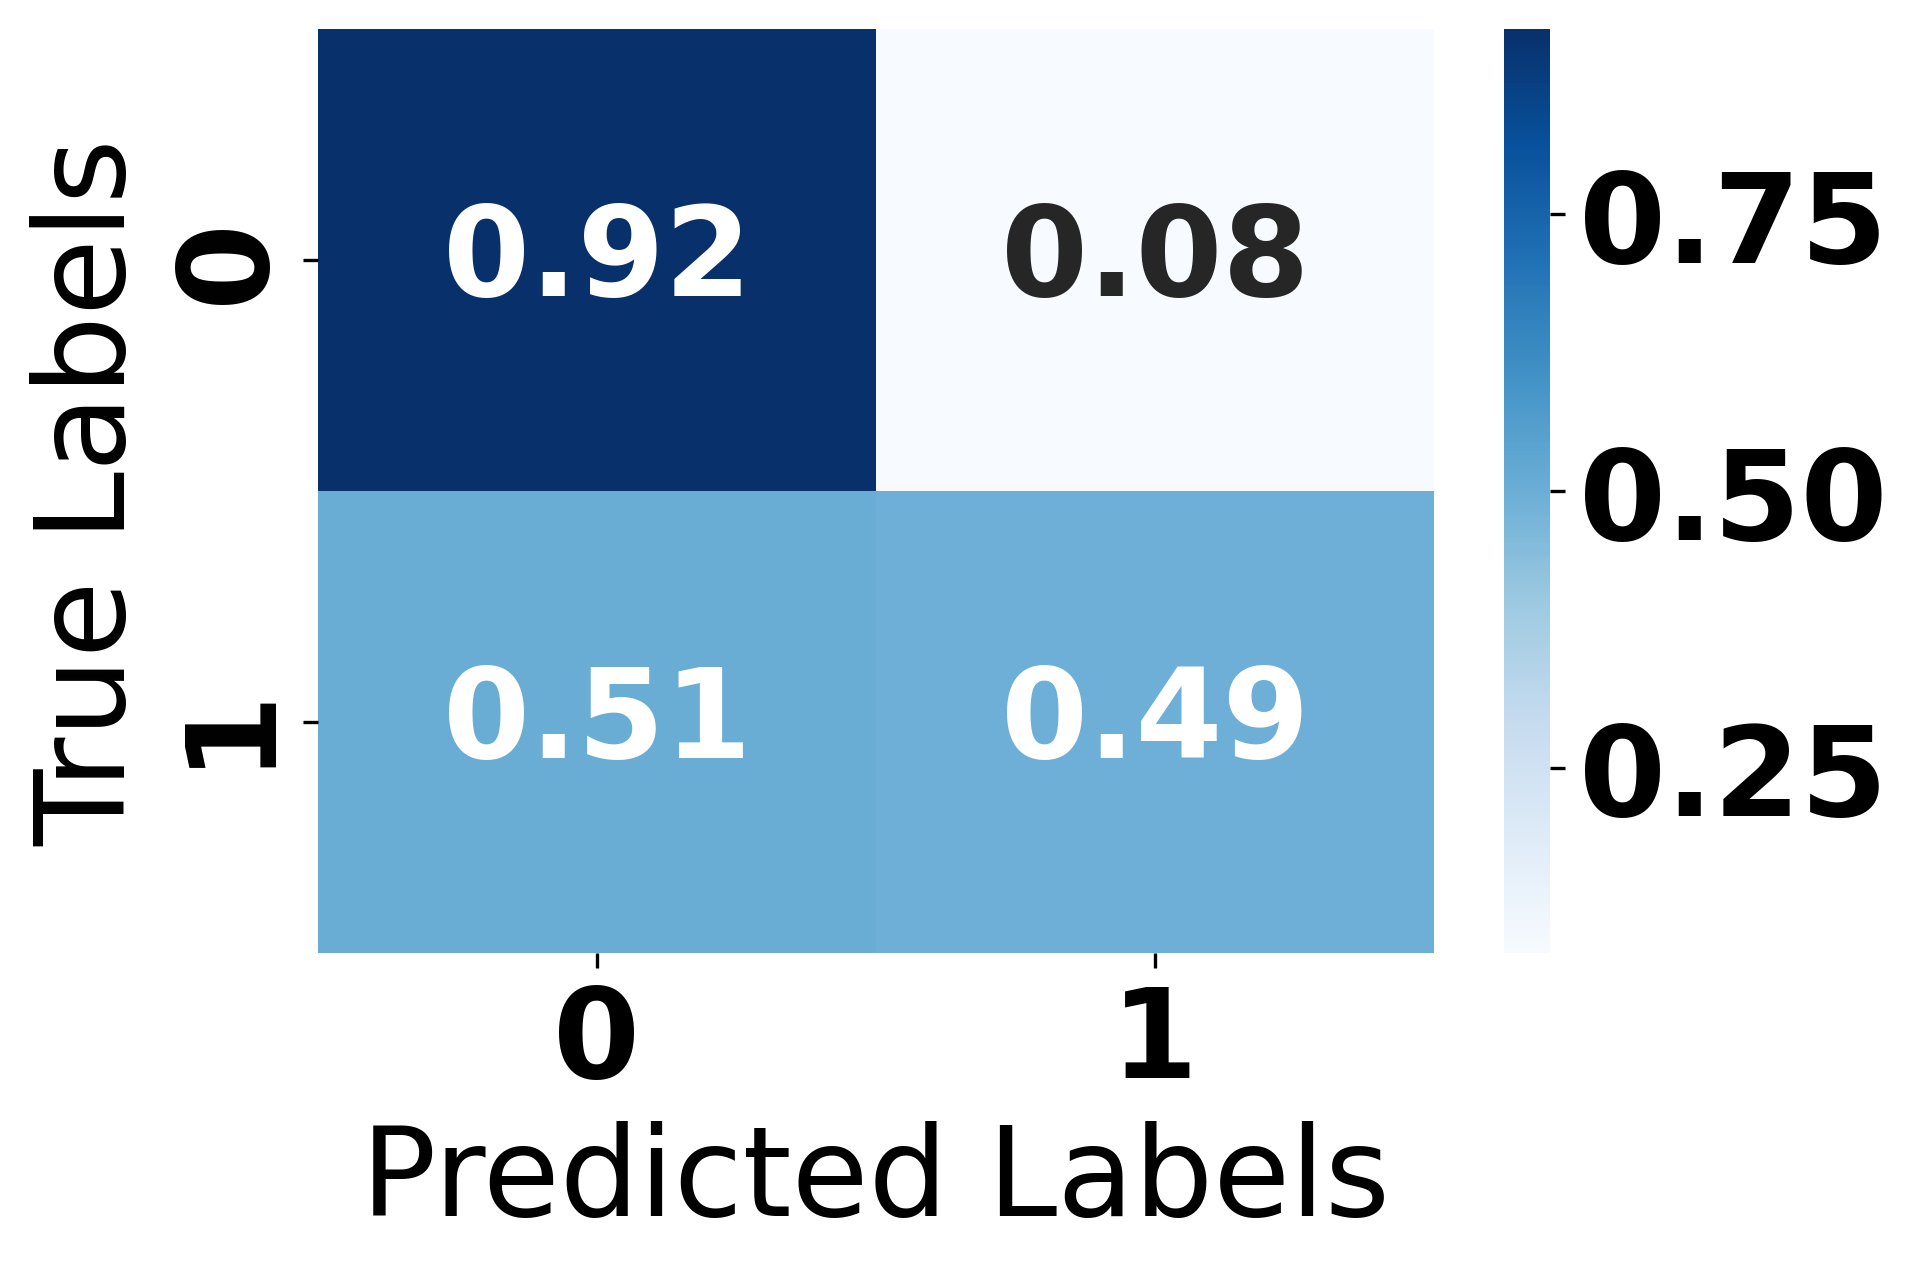

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1711/1711 [==============================] - 12s 6ms/step - loss: 0.5454 - accuracy: 0.7311 - val_loss: 0.5088 - val_accuracy: 0.7529
Epoch 2/10
1711/1711 [==============================] - 11s 7ms/step - loss: 0.5132 - accuracy: 0.7535 - val_loss: 0.4647 - val_accuracy: 0.7746
Epoch 3/10
1711/1711 [==============================] - 11s 7ms/step - loss: 0.5067 - accuracy: 0.7581 - val_loss: 0.5132 - val_accuracy: 0.7558
Epoch 4/10
1711/1711 [==============================] - 10s 6ms/step - loss: 0.4979 - accuracy: 0.7666 - val_loss: 0.3962 - val_accuracy: 0.8330
Epoch 5/10
1711/1711 [==============================] - 9s 5ms/step - loss: 0.4850 - accuracy: 0.7754 - val_loss: 0.4605 - val_accuracy: 0.8219
Epoch 6/10
1711/1711 [==============================] - 10s 6ms/step - loss: 0.4732 - accuracy: 0.7808 - val_loss: 0.3862 - val_accuracy: 0.8515
Epoch 7/10
1711/1711 [==============================] - 11s 7ms/step - loss: 0.4670 - accuracy: 0.7834 - val_loss: 0.4324 - val_acc

3646/3646 [==============================] - 6s 1ms/step
Normalized Confusion Matrix:
[[0.85912459 0.14087541]
 [0.30751914 0.69248086]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.86      0.92    110005
     Class 1       0.23      0.69      0.34      6663

    accuracy                           0.85    116668
   macro avg       0.60      0.78      0.63    116668
weighted avg       0.94      0.85      0.88    116668



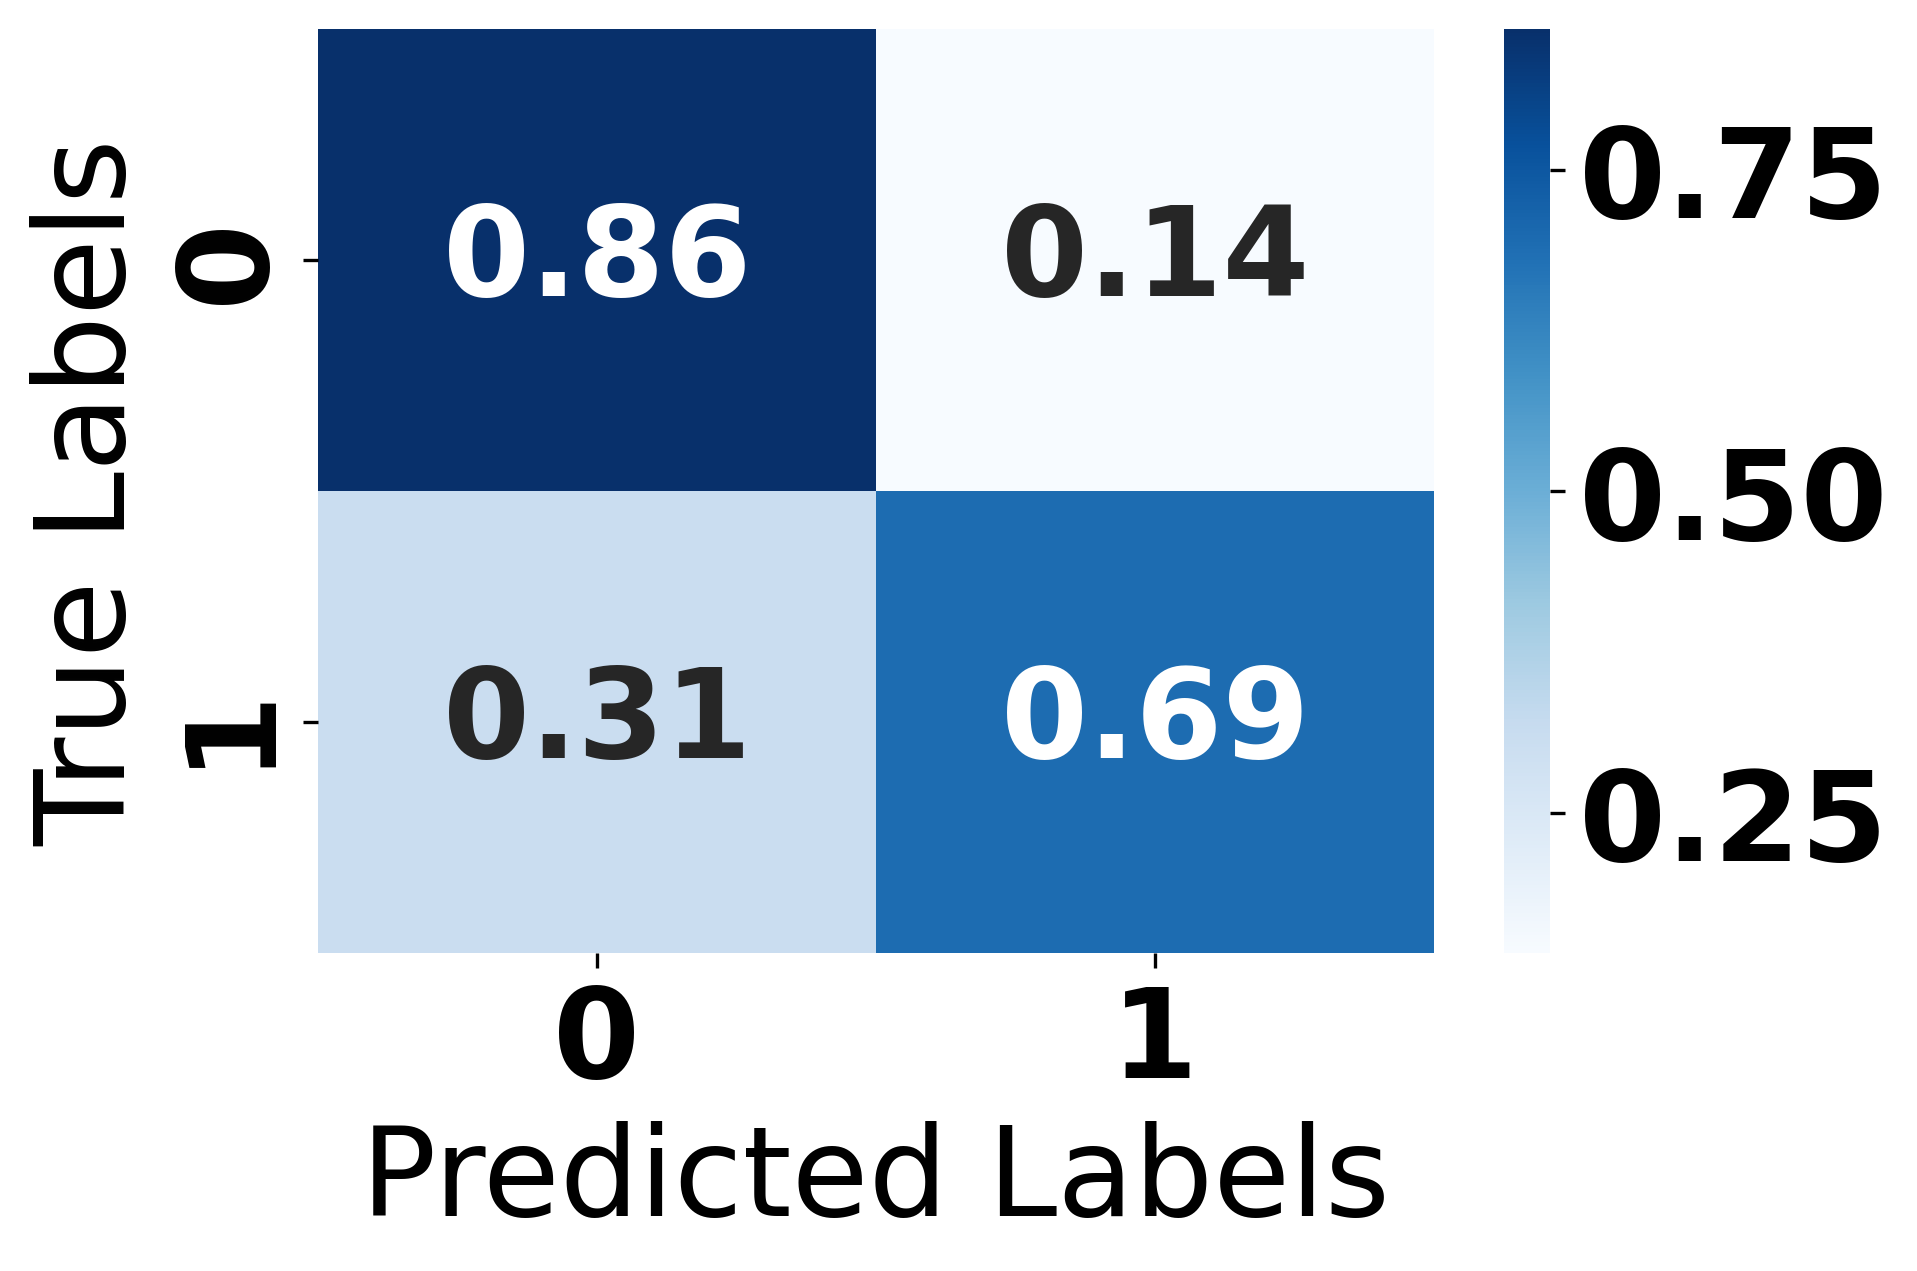

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()